In [2]:
import numpy as np
import sys
import pickle
sys.path.append("Z:\\ChristelleSummer2018\\Code\\Differential-Dynamic-Microscopy---Python\\")
import mpfit
import ddm_clean
import tiff_file
import scipy
from scipy.signal import blackmanharris as bh
import glob   
import pylab

tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [3]:
Data_dir = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Copolymerized\\2018_08_07_25Actin\\2018_08_0725Actin75Tub40fps_1\\"
files = glob.glob(Data_dir+"**ome.tif")
files.sort()

In [4]:
files

['Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Copolymerized\\2018_08_07_25Actin\\2018_08_0725Actin75Tub40fps_1\\2018_08_0725Actin75Tub40fps_1_MMStack_Pos0.ome.tif']

In [5]:
dts = ddm_clean.genLogDist(1,2998,400)

x,y = np.meshgrid(bh(128),bh(128))
filter_func = x*y

ROI = ['0', '128', '256', '384','512','640']

ran = [0, 128, 256, 384, 512, 640]

ran2 = [128, 256, 384, 512, 640, 768]

ROI_b = ['0','256','512']
ran_b = [0,256,512]; 
ran_b2 = [256, 512, 768]

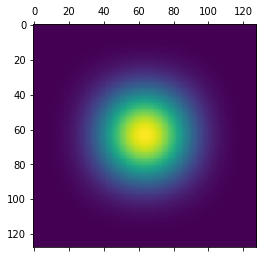

In [6]:

pylab.matshow(filter_func)

In [ ]:
num_frames = 5000
if (num_frames == 1000):
    a = 998
elif (num_frames == 3000):
    a = 1998
elif (num_frames == 5000):
    a = 2998

In [5]:
dts = ddm_clean.genLogDist(1,a,400)
for i in range(len(files)):
    
    im = tiff_file.imread(files)
    
    for j in range(len(ROI)):
        
        fft,dtsB = ddm_clean.getFFTDiffsAtTimes(im[:,65:193,ran[j]:ran2[j]]*filter_func, dts, every=None, limitImsTo=None, submean=True)
        ravs = ddm_clean.radialAvFFTs_v2(fft)
        dts_fft = {'dts':dts, 'ffts':fft, 'ravs':ravs}
        pickle.dump(dts_fft, open(files[i][:-4]+"_"+ROI[j]+"_128x128_FFTDIFFS_dts_ravs.p",'wb'))

Running dt=15...

Running dt=30...

Running dt=45...

Running dt=60...

Running dt=75...

Running dt=90...

Running dt=105...

Running dt=120...

Running dt=165...

Running dt=180...

Running dt=195...

Running dt=300...

Running dt=435...

Running dt=450...

Running dt=510...

Running dt=540...

Running dt=810...

Running dt=1050...

Running dt=1230...

Running dt=1440...

Running dt=1725...

Running dt=2475...

Running dt=2865...

Running dt=15...

Running dt=30...

Running dt=45...

Running dt=60...

Running dt=75...

Running dt=90...

Running dt=105...

Running dt=120...

Running dt=165...

Running dt=180...

Running dt=195...

Running dt=300...

Running dt=435...

Running dt=450...

Running dt=510...

Running dt=540...

Running dt=810...

Running dt=1050...

Running dt=1230...

Running dt=1440...

Running dt=1725...

Running dt=2475...

Running dt=2865...

Running dt=15...

Running dt=30...

Running dt=45...

Running dt=60...

Running dt=75...

Running dt=90...

Running dt=105...


In [ ]:
dts = ddm_clean.genLogDist(1,a,400)
for i in range(len(files)):
    
    im = tiff_file.imread(files)
    
    for j in range(len(ROI_b)):
        
        fft,dtsB = ddm_clean.getFFTDiffsAtTimes(im[:,5:261,ran_b[j]:ran_b2[j]], dts, every=None, limitImsTo=None, submean=True)
        ravs = ddm_clean.radialAvFFTs_v2(fft)
        dts_fft = {'dts':dts, 'ffts':fft, 'ravs':ravs}
        pickle.dump(dts_fft, open(files[i][:-4]+"_"+ROI_b[j]+"_256x256_FFTDIFFS_dts_ravs.p",'wb'))